<a href="https://colab.research.google.com/github/FariqJavier/Depression-Classification/blob/main/Klasifikasi_depresi_dengan_model_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
from torchtext.data import get_tokenizer
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np
import re

In [ ]:
Test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/data/test.tsv', delimiter= '\t')
Val_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/data/dev.tsv', delimiter= '\t')
Train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/data/train.tsv', delimiter= '\t')

In [ ]:
Test_data = Test_data.replace({'not depression': 0, 'moderate': 1, 'severe': 2})
Val_data = Val_data.replace({'not depression': 0, 'moderate': 1, 'severe': 2})
Train_data = Train_data.replace({'not depression': 0, 'moderate' : 1, 'severe' : 2})

In [ ]:
Train_data

,PID,Text_data,Label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,1
1,train_pid_2,My new years resolution : I'm gonna get my ass...,1
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,1
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",1
4,train_pid_5,Sat in the dark and cried myself going into th...,1
...,...,...,...
8886,train_pid_8887,Ways to reverse memory loss from depression? :...,2
8887,train_pid_8888,A Comprehensive Guide To Slowly Getting Better...,2
8888,train_pid_8889,I don’t think college is right for me : TW: su...,2
8889,train_pid_8890,Please help: Severe insomnia affecting me in m...,2


In [ ]:
Val_data

,PID,Text data,Label
0,dev_pid_1,"I enjoyed today, and I still am! Tomorrows dep...",1
1,dev_pid_2,I sorta tried to kill myself : I had a total b...,1
2,dev_pid_3,Best suicide method? : I like it quick and eas...,1
3,dev_pid_4,a story : I remember the time I'd get on my 3D...,1
4,dev_pid_5,The world only cares about beautiful people : ...,1
...,...,...,...
4491,dev_pid_4492,Aren’t we all just tired? : I’ve been depresse...,2
4492,dev_pid_4493,NEED HELP COPING : I had my life pretty much f...,2
4493,dev_pid_4494,Qutting Zoloft Cold Turkey : I was on 75 mg se...,2
4494,dev_pid_4495,Crying : I’m coming off my antidepressants and...,2


In [ ]:
Test_data

,Pid,text data,Class labels
0,test_pid_1,Im scared : This is it. I lie to myself every ...,1
1,test_pid_2,New to this but just wanted to vent : I just f...,1
2,test_pid_3,I’m sad : It’s kinda always been an issue. I w...,1
3,test_pid_4,Lonely but not alone. : All of my immediately ...,1
4,test_pid_5,This year has been trash. : I dont know why I’...,1
...,...,...,...
3240,test_pid_3241,"Feeling lonely. : Hi reddit, I haven’t posted ...",2
3241,test_pid_3242,When would suicide be right? : So I got back f...,2
3242,test_pid_3243,Lowest I’ve ever been ever. : To make a long s...,2
3243,test_pid_3244,Does the Toxoplasma Gondii ruined my life ? (f...,2


In [ ]:
import pandas as pd
from sklearn.utils import resample

In [ ]:
def Balancing_data(data):
    # Cetak nama kolom
    print(data.columns)

    # Urut dataset berdasarkan label
    data = data.sort_values(by="Label")

    # Pisahkan DataFrame berdasarkan label
    data_label_0 = data[data['Label'] == 0]
    data_label_1 = data[data['Label'] == 1]
    data_label_2 = data[data['Label'] == 2]
    print("Label 0 (Before): ", len(data_label_0))
    print("Label 1 (Before): ", len(data_label_1))
    print("Label 2 (Before): ", len(data_label_2))

    # Tentukan jumlah sampel yang ingin disamakan (misalnya, disamakan dengan label 0)
    target_sample_size = len(data_label_0)

    # Oversample label 1 dan label 2
    data_label_1_oversampled = resample(data_label_1, replace=True, n_samples=target_sample_size)
    data_label_2_oversampled = resample(data_label_2, replace=True, n_samples=target_sample_size)
    print("Label 0 (After): ", len(data_label_0))
    print("Label 1 (After): ", len(data_label_1_oversampled))
    print("Label 2 (After): ", len(data_label_2_oversampled))

    # Gabungkan DataFrame yang sudah di-oversample
    data_oversampled = pd.concat([data_label_0, data_label_1_oversampled, data_label_2_oversampled])

    # Shuffle DataFrame
    data_oversampled = data_oversampled.sample(frac=1).reset_index(drop=True)

    return data_oversampled

In [ ]:
Train_data = Balancing_data(Train_data)
Train_data

Index(['PID', 'Text_data', 'Label'], dtype='object')
Label 0 (Before):  1985
Label 1 (Before):  6004
Label 2 (Before):  902
Label 0 (After):  1985
Label 1 (After):  1985
Label 2 (After):  1985


,PID,Text_data,Label
0,train_pid_8544,This world is making me go insane : Its the fi...,2
1,train_pid_6669,i gotta ask : how the hell does any of this he...,1
2,train_pid_3207,What do you do when you feel unwanted? : For t...,1
3,train_pid_8145,I'm sorry... : I just can't go on. I'll be luc...,2
4,train_pid_7272,"Does anyone else ""speak"" to themselves - witho...",0
...,...,...,...
5950,train_pid_8243,"Is anyone awake? : Please help, I need a voice...",2
5951,train_pid_62,“The best years of your life” : Cant shake the...,1
5952,train_pid_7828,Tonight I thought about killing myself for the...,0
5953,train_pid_7760,I have a lot to say : I am not a person who wa...,0


In [ ]:
Val_data = Balancing_data(Val_data)
Val_data

Index(['PID', 'Text data', 'Label'], dtype='object')
Label 0 (Before):  1830
Label 1 (Before):  2306
Label 2 (Before):  360
Label 0 (After):  1830
Label 1 (After):  1830
Label 2 (After):  1830


,PID,Text data,Label
0,dev_pid_3015,Sick of the ups and downs : I was feeling good...,0
1,dev_pid_4393,Goodbye : Is it normal that I’ve come to terms...,2
2,dev_pid_166,So tired : Saved two years of cash to send bac...,1
3,dev_pid_1809,Depressed and working out : I’ve been sufferin...,1
4,dev_pid_4278,6 years since I was diagnosed... : I just turn...,2
...,...,...,...
5485,dev_pid_1403,Nearly a year into my gender transition: What ...,1
5486,dev_pid_150,Overeagerness on sharing things. : Hi lovely p...,1
5487,dev_pid_2869,I feel like my friend is only my friend out of...,0
5488,dev_pid_4156,Anyone else see things out of the corner of th...,2


In [ ]:
Test_data

,Pid,text data,Class labels
0,test_pid_1,Im scared : This is it. I lie to myself every ...,1
1,test_pid_2,New to this but just wanted to vent : I just f...,1
2,test_pid_3,I’m sad : It’s kinda always been an issue. I w...,1
3,test_pid_4,Lonely but not alone. : All of my immediately ...,1
4,test_pid_5,This year has been trash. : I dont know why I’...,1
...,...,...,...
3240,test_pid_3241,"Feeling lonely. : Hi reddit, I haven’t posted ...",2
3241,test_pid_3242,When would suicide be right? : So I got back f...,2
3242,test_pid_3243,Lowest I’ve ever been ever. : To make a long s...,2
3243,test_pid_3244,Does the Toxoplasma Gondii ruined my life ? (f...,2


In [ ]:
contractions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/contractions.csv', index_col='Contraction')
contractions.index = contractions.index.str.lower()
contractions.Meaning = contractions.Meaning.str.lower()
contractions_dict = contractions.to_dict()['Meaning']
contractions_dict

{"'aight": 'alright',
 "ain't": 'is not',
 "amn't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 'dunno': 'do not know',
 "d'ye": 'do you',
 "e'er": 'ever',
 "everybody's": 'everybody is',
 "everyone's": 'everyone is',
 'finna': 'fixing',
 "g'day": 'good day',
 'gimme': 'give me',
 "giv'n": 'given',
 'gonna': 'going to',
 "gon't": 'go not',
 'gotta': 'got to',
 "hadn't": 'had not',
 "had've": 'had have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had',
 "he'll": 'he will',
 "he's": 'he is',
 "he've": 'he have',
 "how'd": 'how did',
 'howdy': 'how do you do',
 "how'll": 'how will',
 "how're": 'how are',
 "how's": 'how is',
 "i'd\ti": 'had',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'm": 'i am',
 "i'm'a": 'i am abo

In [ ]:
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

def preprocess_apply(text):

    text = text.lower()

    # Replace all "’" to "'"
    text = text.replace("’", "'")

    for contraction, replacement in contractions_dict.items():
        text = text.replace(contraction, replacement)

    # Replace @USERNAME to '<user>'.
    text = re.sub(userPattern,'<user>', text)

    # Replace all emojis.
    text = re.sub(r'<3', '<heart>', text)
    text = re.sub(smileemoji, '<smile>', text)
    text = re.sub(sademoji, '<sadface>', text)
    text = re.sub(neutralemoji, '<neutralface>', text)
    text = re.sub(lolemoji, '<lolface>', text)

    # Remove non-alphanumeric and symbols
    text = re.sub(alphaPattern, ' ', text)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    text = re.sub(r'/', ' / ', text)
    return text

In [ ]:
Test_data["text data"] = Test_data['text data'].apply(preprocess_apply)
Test_data["text data"]

0       im scared   this is it  i lie to myself every ...
1       new to this but just wanted to vent   i just f...
2       i am sad   it is kinda always been an issue  i...
3       lonely but not alone    all of my immediately ...
4       this year has been trash    i dont know why i ...
                              ...                        
3240    feeling lonely    hi reddit  i have not posted...
3241    when would suicide be right    so i got back f...
3242    lowest i have ever been ever    to make a long...
3243    does the toxoplasma gondii ruined my life    f...
3244    getting the correct diagnosis   currently goin...
Name: text data, Length: 3245, dtype: object

In [ ]:
Train_data["Text_data"] = Train_data['Text_data'].apply(preprocess_apply)
Train_data["Text_data"]

0       this world is making me go insane   its the fi...
1       i got to ask   how the hell does any of this h...
2       what do you do when you feel unwanted    for t...
3       i am sorry      i just cannot go on  i will be...
4       does anyone else  speak  to themselves   witho...
                              ...                        
5950    is anyone awake    please help  i need a voice...
5951     the best years of your life    cant shake the...
5952    tonight i thought about killing myself for the...
5953    i have a lot to say   i am not a person who wa...
5954    something i have wrote a few minutes ago   and...
Name: Text_data, Length: 5955, dtype: object

In [ ]:
Val_data["Text data"] = Val_data['Text data'].apply(preprocess_apply)
Val_data["Text data"]

0       sick of the ups and downs   i was feeling good...
1       goodbye   is it normal that i have come to ter...
2       so tired   saved two years of cash to send bac...
3       depressed and working out   i have been suffer...
4       6 years since i was diagnosed      i just turn...
                              ...                        
5485    nearly a year into my gender transition  what ...
5486    overeagerness on sharing things    hi lovely p...
5487    i feel like my friend is only my friend out of...
5488    anyone else see things out of the corner of th...
5489    i want help but all the help i have gotten doe...
Name: Text data, Length: 5490, dtype: object

In [ ]:
# convert to list so it can be used by tokenizer
Train_text = Train_data["Text_data"].tolist()
Train_text

['this world is making me go insane   its the first day of 2020 and i hope that everyone else sees the world in my perspective but i just cant take it anymore i know someone will disagree with me and proably downvote this post for having a different opinion but i am just going to say it when these hk protest started i did not care but when i heard of people getting hurt on both sides i started to act a little skeptical and concerned one day i posted a video of a chinese man getting set on fire on r morbidlyreality and all i got was  this is fake  and  your just the ten cent army  and when i saw a picture of a protestor who got hit in the face with a gas canister everyone was supporting him and saying whoever did this were monsters and i am like ok then so i can sucker punch an old man for having a different opinion but if he has your opinion then i am the monster this revelation just changed everything its all  free hk  i see everywhere but never stopping and thinking  maybe my side ha

In [ ]:
Train_label = Train_data["Label"].tolist()
Train_label

[2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 1,


In [ ]:
# convert to list so it can be used by tokenizer
Val_text = Val_data["Text data"].tolist()
Val_text

['sick of the ups and downs   i was feeling good for a while when i took abilify  things finally felt  normal  for the first time in my entire life  i really think it was the one time ever i felt what other people feel happiness as  then i started getting some pretty horrible rare side effects and now i have been off it for a few weeks and i am back to severe depression  i just want it to stop already  even if i just felt less severe depression i d be fine  i do not need to ever feel that normal person happiness ever again even  i just do not want to be this low    sometimes i wish i could kill myself  but i do not have the balls to disappoint my family more than i already have  plus i have a disabled mother to take care of ',
 'goodbye   is it normal that i have come to terms with dying  i feel like most people on the day of their fucking suicide do not feel so    calm  and peaceful  i am just sat on the bus listening to music on the way to steal 10 boxes of ibuprofen  if 8 brought me

In [ ]:
Val_label = Val_data["Label"].tolist()
Val_label

[0,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 2,


In [ ]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [ ]:
# set seed so we'll have the same results in different runs:
def set_seed(seed: int):
    """
    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [ ]:
# the model we gonna train, base uncased BERT
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)
# tokenize the dataset, truncate when passed `max_length`,
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(Train_text, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(Val_text, truncation=True, padding=True, max_length=max_length)

In [ ]:
class PostingsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = PostingsDataset(train_encodings, Train_label)
valid_dataset = PostingsDataset(valid_encodings, Val_label)

In [ ]:
# load the model and pass to CUDA
# set num_label to the length of available labels
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3).to("cuda")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [ ]:
!pip install -U accelerate
!pip install -U transformers

In [ ]:
#  TrainingArguments class to specify our training arguments, such as the number of epochs, batch size, and some other parameters
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=400,               # log & save weights each logging_steps
    save_steps=400,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
# using Transformers Trainer to train model
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
400,0.820300,1.033512,0.533880
800,0.527900,1.282678,0.561020
1200,0.394500,1.924148,0.538616
1600,0.289000,2.397064,0.531148
2000,0.177300,2.076197,0.561566
2400,0.150200,2.436373,0.551730
2800,0.073900,2.877307,0.541348
3200,0.053300,2.956831,0.530419
3600,0.040800,2.738810,0.549727


TrainOutput(global_step=3725, training_loss=0.2718082099312904, metrics={'train_runtime': 4513.768, 'train_samples_per_second': 6.596, 'train_steps_per_second': 0.825, 'total_flos': 7834202012851200.0, 'train_loss': 0.2718082099312904, 'epoch': 5.0})

In [ ]:
# evaluate the current model after training
trainer.evaluate()

{'eval_loss': 1.0335115194320679,
 'eval_accuracy': 0.533879781420765,
 'eval_runtime': 177.9187,
 'eval_samples_per_second': 30.857,
 'eval_steps_per_second': 1.546,
 'epoch': 5.0}

In [ ]:
# saving the fine tuned model & tokenizer
model_path = "/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/model/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/model/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/model/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/model/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/Text_classification_with_transformer/model/tokenizer.json')

In [ ]:
# convert to list so it can be used to predic
Test_text = Test_data["text data"].tolist()
Test_text

['im scared   this is it  i lie to myself every day and say ill make it out but i think this might just be it    i thought i wanted a girlfriend but i realize that what i really want is to feel loved  ive spent 20 years on this earth but ive felt completely alone forever  my heart hurts  my subconscious taunts me every night only for me to wake up to the reality that im a loser who is not worth anyones time    im scared i will live like this until the day i die   im being torn from the inside but im too much of coward to end it all   im sorry',
 'new to this but just wanted to vent   i just finally realized that i am kind of in a bad mental state  thereis this feeling of dread in me  i do not want to work so i made an excuse not to go to work  i kind of feel like all of this stem from being financially unstable where i am living pay check to pay check  hating my job because of the toxic environment i just had enough of it where i am feeling like i have to walk on eggshells around peopl

In [ ]:
# convert to list so it can be used to predic
Test_label = Test_data["Class labels"].tolist()
Test_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
test_encodings = tokenizer(Test_text, truncation=True, padding=True, max_length=max_length)
test_dataset = PostingsDataset(test_encodings, Test_label)

In [ ]:
# Evaluasi model pada data test
results = trainer.predict(test_dataset)
predictions = np.argmax(results.predictions, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = Test_data['Class labels']  # Ganti dengan labels sebenarnya dari data test
cm = confusion_matrix(true_labels, predictions)

In [ ]:
!pip install seaborn

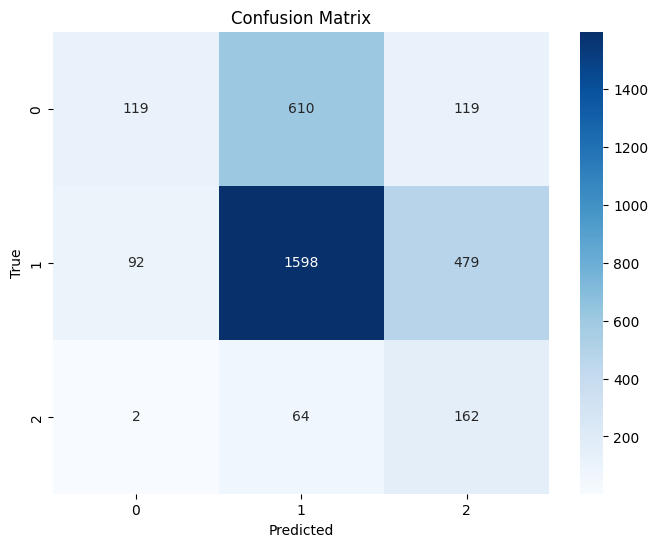

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()